# Insurance Dataset
## Author
- Liam Upstone-Smith
- 21017958

### Research Question
(Each Jupyter notebook should begin with 
a brief introduction, identifying the
stakeholders and outlining the resrch questions)<br>
......

## Packages

In [3]:
# Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import numpy as np
import time
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree


## load in data

In [20]:
# Load in Insurance data as panda Dataframe
df = pd.read_csv("insurance-adapted.csv")

## Data Preprocessing
### Checking for null values

The number of rows and columns (1338, 7)
age         20
sex          0
bmi          0
children     0
smoker       0
region       0
charges      0
dtype: int64


<Axes: >

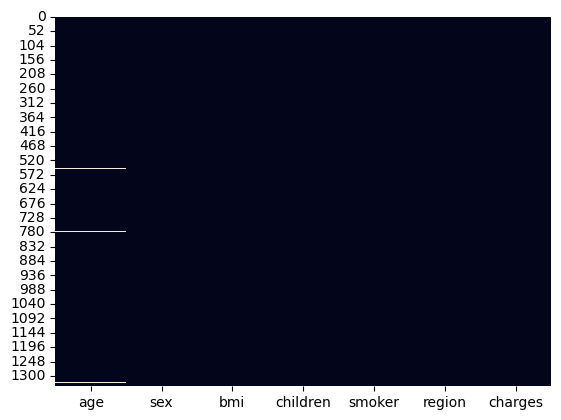

In [22]:
print("The number of rows and columns", df.shape)

# Checking if there are any empty values
print(df.isnull().sum())

# Creates heatmap of missing values
sns.heatmap(df.isnull(), cbar=False)

### Remove rows with null values
Because, there are only 3 rows with null values, and those null values are in age which I cannot accuratly predct, I just removed those rows. Although I complely removed these rows, it still left me with over 1300 rows of data to work with.

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


<Axes: >

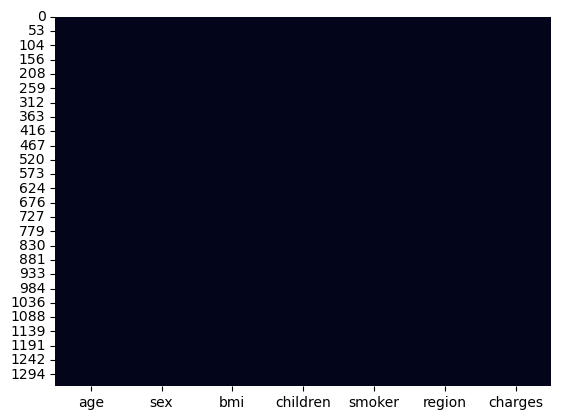

In [24]:
# Dropping the rows with missing values 
df = df.dropna()

# Checking if there are any empty values
print(df.isnull().sum())

# Creates heatmap of values to show no missing values
sns.heatmap(df.isnull(), cbar=False)

### Encode data
I am encoding the sex and smoker features to improve the readability for the model.<br> Allowing it to interpret the data better and therefore, make more optimal predictions

In [26]:
# Encode categorical variables
label_encoder_sex = LabelEncoder()
df['sex'] = label_encoder_sex.fit_transform(df['sex'])  # 0 for female, 1 for male

label_encoder_smoker = LabelEncoder()
df['smoker'] = label_encoder_smoker.fit_transform(df['smoker'])  # 0 for no, 1 for yes
print(df)

# Define features (X) and target (y)
X = df[['age', 'sex', 'bmi', 'charges']]
y = df['smoker']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

       age  sex     bmi  children  smoker     region      charges
0     19.0    0  27.900         0       1  southwest  16884.92400
1     18.0    1  33.770         1       0  southeast   1725.55230
2     28.0    1  33.000         3       0  southeast   4449.46200
3     33.0    1  22.705         0       0  northwest  21984.47061
4     32.0    1  28.880         0       0  northwest   3866.85520
...    ...  ...     ...       ...     ...        ...          ...
1333  50.0    1  30.970         3       0  northwest  10600.54830
1334  18.0    0  31.920         0       0  northeast   2205.98080
1335  18.0    0  36.850         0       0  southeast   1629.83350
1336  21.0    0  25.800         0       0  southwest   2007.94500
1337  61.0    0  29.070         0       1  northwest  29141.36030

[1318 rows x 7 columns]


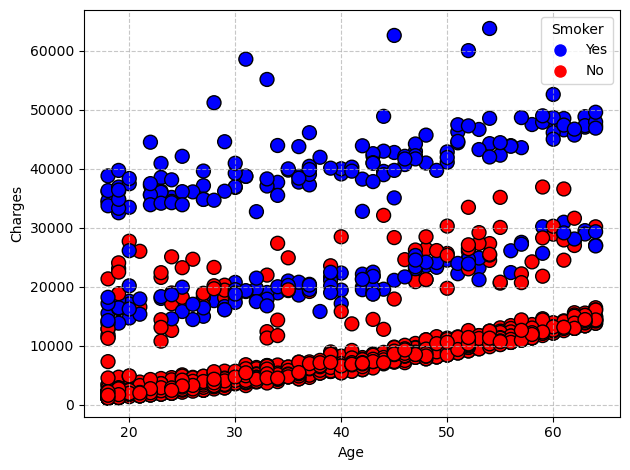

In [28]:
# Age and Charges, labeled based on smoker Status
smoker  = df.smoker

# Map regions to colors
color_map = {1: 'blue', 0 : 'red'}
colors = [color_map[smoke] for smoke in smoker]

# Create scatter plot
plt.scatter(df.age, df.charges, c=colors, edgecolor='k', s=100)
plt.xlabel('Age')
plt.ylabel('Charges')
plt.grid(True, linestyle='--', alpha=0.7)

#add legend
from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Yes'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='No')
]
plt.legend(handles=legend_elements, title="Smoker")

# Show plot
plt.tight_layout()
plt.show()

# K Nearest Neighbour
###### Using BMI and insurance charges data.

In [17]:
# Train KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)  # Tune the number of neighbors
knn.fit(X_train_scaled, y_train)

# Predict on test set
y_pred = knn.predict(X_test_scaled)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9848484848484849
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99       207
           1       0.95      0.98      0.97        57

    accuracy                           0.98       264
   macro avg       0.97      0.98      0.98       264
weighted avg       0.99      0.98      0.98       264



## Fine Tune Parameters
### Exploring the number of neighbors used
I am repeating the experiment with varying number of neighbours used as a parameter for the model. <br>
As shown in the 'Accuracy vs Number of Neighbors (K)' graph, using either 3 or 7 neighbours gives me the highest accuracy at 0.985, <br>
and therefore to optimise the knn model, it can use either 3 or 7 neighbours. Using a higher number of neihgbours can reduce noise in classification,<br> but can also make the boundaries between classes to be less distinct. 

The 'F1-score vs Number of Neighbours (K)' graph also supports the claim of 3 or 7 being the optimal number of neighbours to be used in the model.

Optimal number of neighbours: 3


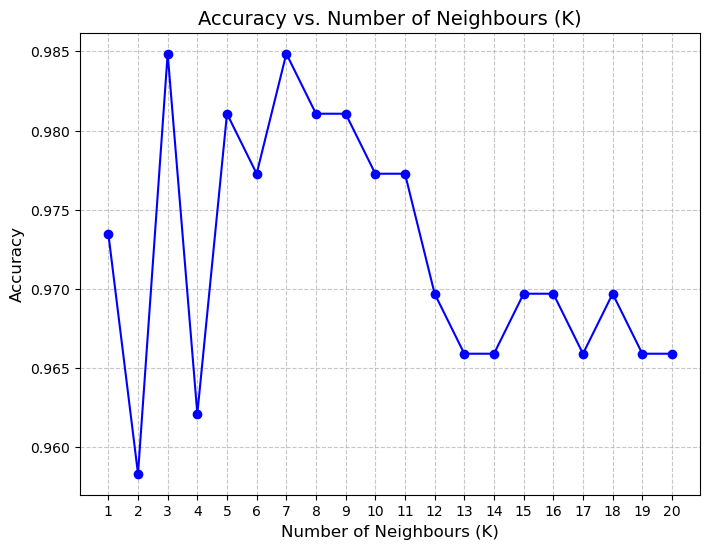

In [19]:
# Vary the number of neighbours
neighbors = range(1, 21) # Checks up to 20 neighbours
accuracies = []

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    accuracies.append(accuracy_score(y_test, y_pred))

# Print out optimal value
optimal_neighbours = neighbors[np.argmax(accuracies)]
print(f"Optimal number of neighbours: {optimal_neighbours}")

# Plot the results
plt.figure(figsize=(8, 6))
plt.plot(neighbors, accuracies, marker='o', linestyle='-', color='blue')
plt.title('Accuracy vs. Number of Neighbours (K)', fontsize=14)
plt.xlabel('Number of Neighbours (K)', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.xticks(neighbors)
plt.grid(linestyle='--', alpha=0.7)
plt.show()

Optimal number of neighbours: 7


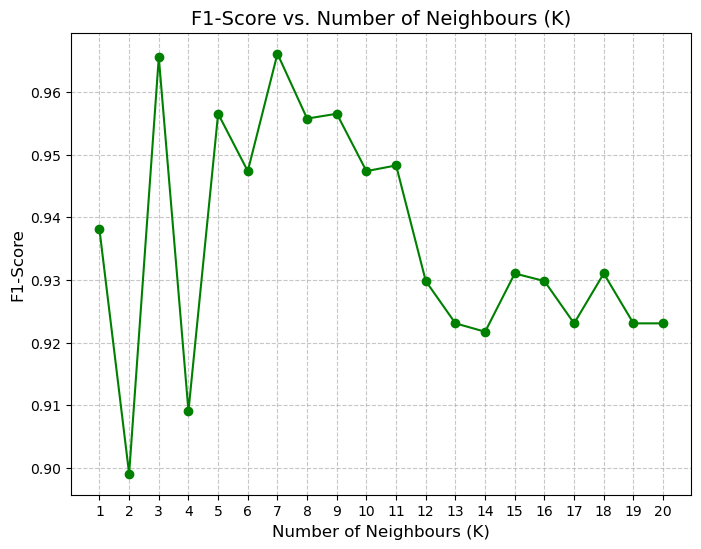

In [20]:

# Vary the number of neighbours
neighbors = range(1, 21) # Checks up to 20 neighbours
f1_scores = []

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    f1_scores.append(f1_score(y_test, y_pred))

# Print out optimal value
optimal_neighbours = neighbors[np.argmax(f1_scores)]
print(f"Optimal number of neighbours: {optimal_neighbours}")

# Plot the F1-score
plt.figure(figsize=(8, 6))
plt.plot(neighbors, f1_scores, marker='o', linestyle='-', color='green')
plt.title('F1-Score vs. Number of Neighbours (K)', fontsize=14)
plt.xlabel('Number of Neighbours (K)', fontsize=12)
plt.ylabel('F1-Score', fontsize=12)
plt.xticks(neighbors)
plt.grid(linestyle='--', alpha=0.7)
plt.show()

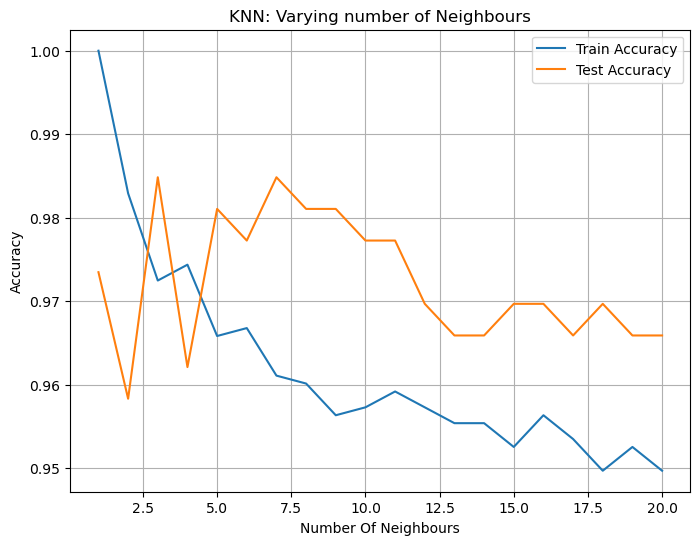

In [21]:
train_score = {}
test_score = {}

# Vary the number of neighbours
n_neighbors = range(1, 21) # Checks up to 20 neighbours

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score[k]=knn.score(X_train_scaled, y_train)
    test_score[k] = knn.score(X_test_scaled, y_test)

plt.figure(figsize=(8, 6))
plt.plot(n_neighbors, train_score.values(), label="Train Accuracy")
plt.plot(n_neighbors, test_score.values(), label="Test Accuracy")
plt.xlabel("Number Of Neighbours")
plt.ylabel("Accuracy")
plt.title("KNN: Varying number of Neighbours")
plt.legend()
plt.grid()
plt.show()

## Reflection
I chose KNN as I had a good understanding of the concept and felt it fit the needs of my research question. I implemented the KNeighborsClassifier from scikit learn, which streamlined the process and allowed me more time for data analysis and fine tuning the parameters.<br>
To fine tune the parameters I made 20 iterations and compared the accuracy of each iteration. I found that 7 neighbours gave the highest accuracy, however when I plotted the accuracy over iterations the graph showed that 3 neighbours gave the same level of accuracy. Although, 3 is a very samll number of neighbours which works with this small dataset, but this will stop any scalability.<br>


# Linear Regression

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error

## Load in data

In [9]:
# Load in Insurance data as panda Dataframe
data = pd.read_csv("insurance-adapted.csv")

## Preprocessing

### Encode Data

In [11]:
# Impute missing values in the 'age' column with the median
data['age'] = data['age'].fillna(data['age'].median())

# Encode categorical variables
encoded_data = pd.get_dummies(data, columns=['sex', 'region'], drop_first=True)  # One-hot encode with drop_first=True
encoded_data['smoker'] = encoded_data['smoker'].map({'yes': 1, 'no': 0})  # Binary encoding for smoker

# Display the processed data
encoded_data.head()

,age,bmi,children,smoker,charges,sex_male,region_northwest,region_southeast,region_southwest
0,19.0,27.900,0,1,16884.92400,False,False,False,True
1,18.0,33.770,1,0,1725.55230,True,False,True,False
2,28.0,33.000,3,0,4449.46200,True,False,True,False
3,33.0,22.705,0,0,21984.47061,True,True,False,False
4,32.0,28.880,0,0,3866.85520,True,True,False,False


### Split Data

In [13]:
# Separate features and target variable
X = encoded_data.drop(columns='charges')
y = encoded_data['charges']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Train Model

In [15]:
# Train a Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Make predictions
y_pred = linear_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

# Print out values
print(f"Mean Absolute Error: {mae}")
print(f"\nMean Squared Error: {mse}")
print(f"\nRoot Mean Squared Error: {rmse}")

Mean Absolute Error: 4203.412754261006

Mean Squared Error: 33683329.08874916

Root Mean Squared Error: 5803.734064268379


## Ridge Regression
Ridge Regression is a regularized form of Linear Regression that penalizes large coefficients to prevent overfitting. Smaller alpha values allows the model to act similar to Linear Regression (less regularisation), where as, larger values increase regularisation therefore reducing overfitting but possibly leading to underfitting.

In [21]:
# Define Ridge Regression model
ridge = Ridge()

# Define a grid of alpha values to search over
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100, 1000]}

# Use GridSearchCV to find the best alpha
grid_search = GridSearchCV(ridge, param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)

# Get the best model
best_ridge_model = grid_search.best_estimator_

# Use the best model to make predictions
ridge_predictions = best_ridge_model.predict(X_test)

# Evaluate the model
ridge_mae = mean_absolute_error(y_test, ridge_predictions)
ridge_mse = mean_squared_error(y_test, ridge_predictions)
ridge_rmse = ridge_mse ** 0.5

print(f"Best alpha: {grid_search.best_params_['alpha']}")
print(f"MAE: {ridge_mae}\nMSE: {ridge_mse}\nRMSE: {ridge_rmse}")

Best alpha: 1
MAE: 4215.680459471409
MSE: 33731832.18247366
RMSE: 5807.911172054343


## Analysis
...

# Neural Network